In [1]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from geopy.geocoders import Nominatim #for going from loctaion to coordinates (lan/lon)
from geopy.exc import GeocoderTimedOut

# Data Cleaning

In [2]:
#reading the csv file into a dataframe 
shootings_df = pd.read_csv('usmassdata.csv', encoding='latin-1')
shootings_df.head()

,Case,Location,Date,Year,Summary,Fatalities,Injured,Total victims,Venue,Prior signs of mental health issues,...,Where obtained,Type of weapons,Weapon details,Race,Gender,Sources,Mental Health Sources,latitude,longitude,Type
0,Yountville veterans home shooting,"Yountville, CA",3/9/18,2018,"Army veteran Albert Cheung Wong, 36, stormed a...",3,0,3,Workplace,Yes,...,TBD,semiautomatic rifle; shotgun,NaN,Asian,M,https://www.cnn.com/2018/03/10/us/california-v...,https://www.cnn.com/2018/03/10/us/california-v...,NaN,NaN,Mass
1,Stoneman Douglas High School shooting,"Parkland, Florida",2/14/18,2018,"Nikolas J. Cruz, 19, heavily armed with an AR-...",17,14,31,School,Yes,...,A Florida pawn shop,semiautomatic rifle,AR-15,White,M,https://www.nytimes.com/2018/02/14/us/parkland...,https://www.nytimes.com/2018/02/15/us/nikolas-...,NaN,NaN,Mass
2,Pennsylvania carwash shooting,"Melcroft, PA",1/28/18,2018,"Timothy O'Brien Smith, 28, wearing body armor ...",4,1,5,Other,TBD,...,TBD,semiautomatic rifle and semiautomatic handgun,NaN,White,M,http://www.wpxi.com/news/top-stories/family-me...,NaN,NaN,NaN,Mass
3,Rancho Tehama shooting spree,"Rancho Tehama, CA",11/14/17,2017,"Kevin Janson Neal, 44, went on an approximatel...",5,10,15,Other,TBD,...,TBD,semiautomatic rifles,Two illegally modified rifles,White,M,https://www.nbcnews.com/news/us-news/californi...,NaN,NaN,NaN,Spree
4,Texas First Baptist Church massacre,"Sutherland Springs, TX",11/5/17,2017,"Devin Patrick Kelley, a 26-year-old ex-US Air ...",26,20,46+,Religious,Yes,...,Purchased in April 2016 from an Academy Sports...,semiautomatic rifle,Ruger AR-556; Kelley also possessed semiautoma...,White,M,https://www.washingtonpost.com/news/morning-mi...,http://www.expressnews.com/news/local/article/...,32.780105,-96.800008,Mass


In [3]:
#testing for Geopy to retrieve (latitude , longitude) based on the "Location" field of the dataframe 
test_address = "Sutherland Springs, TX"
geolocator = Nominatim()
try:
    location = geolocator.geocode(test_address)
    print((location.latitude, location.longitude))
except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s"%(test_address, e.message))

(29.2740444, -98.0559057)


In [4]:
# Loop through the dataframe to check if the latitude is missing. 
# If the Latitue is a "NaN" then update the (Lat, Lon) data from Geopy

for index, row in shootings_df.iterrows():
    if(pd.isnull(row['latitude'])):
        geolocator=Nominatim(timeout=3)
        try:
            location = geolocator.geocode(row['Location'])
            shootings_df.loc[index, 'latitude']= location.latitude
            shootings_df.loc[index, 'longitude']= location.longitude
        except GeocoderTimedOut as e:
            print("Error: geocode failed on input %s with message %s"%(row['Location'], e.message))      

In [5]:
# adding redults to another dataframe so that there is no confusion when referencing for Database creation 
complete_shootings_df = shootings_df
complete_shootings_df.head()      

,Case,Location,Date,Year,Summary,Fatalities,Injured,Total victims,Venue,Prior signs of mental health issues,...,Where obtained,Type of weapons,Weapon details,Race,Gender,Sources,Mental Health Sources,latitude,longitude,Type
0,Yountville veterans home shooting,"Yountville, CA",3/9/18,2018,"Army veteran Albert Cheung Wong, 36, stormed a...",3,0,3,Workplace,Yes,...,TBD,semiautomatic rifle; shotgun,NaN,Asian,M,https://www.cnn.com/2018/03/10/us/california-v...,https://www.cnn.com/2018/03/10/us/california-v...,38.395445,-122.360173,Mass
1,Stoneman Douglas High School shooting,"Parkland, Florida",2/14/18,2018,"Nikolas J. Cruz, 19, heavily armed with an AR-...",17,14,31,School,Yes,...,A Florida pawn shop,semiautomatic rifle,AR-15,White,M,https://www.nytimes.com/2018/02/14/us/parkland...,https://www.nytimes.com/2018/02/15/us/nikolas-...,26.310079,-80.237270,Mass
2,Pennsylvania carwash shooting,"Melcroft, PA",1/28/18,2018,"Timothy O'Brien Smith, 28, wearing body armor ...",4,1,5,Other,TBD,...,TBD,semiautomatic rifle and semiautomatic handgun,NaN,White,M,http://www.wpxi.com/news/top-stories/family-me...,NaN,40.052018,-79.389202,Mass
3,Rancho Tehama shooting spree,"Rancho Tehama, CA",11/14/17,2017,"Kevin Janson Neal, 44, went on an approximatel...",5,10,15,Other,TBD,...,TBD,semiautomatic rifles,Two illegally modified rifles,White,M,https://www.nbcnews.com/news/us-news/californi...,NaN,39.993786,-122.471880,Spree
4,Texas First Baptist Church massacre,"Sutherland Springs, TX",11/5/17,2017,"Devin Patrick Kelley, a 26-year-old ex-US Air ...",26,20,46+,Religious,Yes,...,Purchased in April 2016 from an Academy Sports...,semiautomatic rifle,Ruger AR-556; Kelley also possessed semiautoma...,White,M,https://www.washingtonpost.com/news/morning-mi...,http://www.expressnews.com/news/local/article/...,32.780105,-96.800008,Mass


In [6]:
# list of all column headers
list(complete_shootings_df)

['Case',
 'Location',
 'Date',
 'Year',
 'Summary',
 'Fatalities',
 'Injured',
 'Total victims',
 'Venue',
 'Prior signs of mental health issues',
 'Mental health - details',
 'Weapons obtained legally',
 'Where obtained',
 'Type of weapons',
 'Weapon details',
 'Race',
 'Gender',
 'Sources',
 'Mental Health Sources',
 'latitude',
 'longitude',
 'Type']

In [7]:
#rename column headers so that there are no spaces & better usability

complete_shootings_df = complete_shootings_df.rename(columns={'Case': 'case', 
                                        'Location': 'location', 
                                        'Date': 'date', 
                                        'Year': 'year', 
                                        'Summary': 'summary', 
                                        'Fatalities': 'fatalities', 
                                        'Injured': 'injured', 
                                        'Total victims': 'total_victims', 
                                        'Venue': 'venue', 
                                        'Prior signs of mental health issues': 'prior_signs_mental_health', 
                                        'Mental health - details': 'mental_health', 
                                        'Weapons obtained legally': 'weapons_obtained_legally', 
                                        'Where obtained': 'where_obtained',
                                        'Type of weapons': 'type_weapon', 
                                        'Weapon details': 'weapon_details', 
                                        'Race': 'race', 
                                        'Gender': 'gender', 
                                        'Sources': 'sources', 
                                        'Mental Health Sources': 'mental_health_sources', 
                                        'Type': 'shooting_type'})

complete_shootings_df.head()

,case,location,date,year,summary,fatalities,injured,total_victims,venue,prior_signs_mental_health,...,where_obtained,type_weapon,weapon_details,race,gender,sources,mental_health_sources,latitude,longitude,shooting_type
0,Yountville veterans home shooting,"Yountville, CA",3/9/18,2018,"Army veteran Albert Cheung Wong, 36, stormed a...",3,0,3,Workplace,Yes,...,TBD,semiautomatic rifle; shotgun,NaN,Asian,M,https://www.cnn.com/2018/03/10/us/california-v...,https://www.cnn.com/2018/03/10/us/california-v...,38.395445,-122.360173,Mass
1,Stoneman Douglas High School shooting,"Parkland, Florida",2/14/18,2018,"Nikolas J. Cruz, 19, heavily armed with an AR-...",17,14,31,School,Yes,...,A Florida pawn shop,semiautomatic rifle,AR-15,White,M,https://www.nytimes.com/2018/02/14/us/parkland...,https://www.nytimes.com/2018/02/15/us/nikolas-...,26.310079,-80.237270,Mass
2,Pennsylvania carwash shooting,"Melcroft, PA",1/28/18,2018,"Timothy O'Brien Smith, 28, wearing body armor ...",4,1,5,Other,TBD,...,TBD,semiautomatic rifle and semiautomatic handgun,NaN,White,M,http://www.wpxi.com/news/top-stories/family-me...,NaN,40.052018,-79.389202,Mass
3,Rancho Tehama shooting spree,"Rancho Tehama, CA",11/14/17,2017,"Kevin Janson Neal, 44, went on an approximatel...",5,10,15,Other,TBD,...,TBD,semiautomatic rifles,Two illegally modified rifles,White,M,https://www.nbcnews.com/news/us-news/californi...,NaN,39.993786,-122.471880,Spree
4,Texas First Baptist Church massacre,"Sutherland Springs, TX",11/5/17,2017,"Devin Patrick Kelley, a 26-year-old ex-US Air ...",26,20,46+,Religious,Yes,...,Purchased in April 2016 from an Academy Sports...,semiautomatic rifle,Ruger AR-556; Kelley also possessed semiautoma...,White,M,https://www.washingtonpost.com/news/morning-mi...,http://www.expressnews.com/news/local/article/...,32.780105,-96.800008,Mass


In [8]:
# recheck column headers
complete_shootings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 22 columns):
case                         98 non-null object
location                     98 non-null object
date                         98 non-null object
year                         98 non-null int64
summary                      98 non-null object
fatalities                   98 non-null int64
injured                      98 non-null object
total_victims                98 non-null object
venue                        98 non-null object
prior_signs_mental_health    98 non-null object
mental_health                87 non-null object
weapons_obtained_legally     98 non-null object
where_obtained               86 non-null object
type_weapon                  98 non-null object
weapon_details               91 non-null object
race                         96 non-null object
gender                       98 non-null object
sources                      98 non-null object
mental_health_sources        76 non

In [11]:
#update the new dataframe with city/state split from location
complete_shootings_df[['city', 'state']] = complete_shootings_df.location.str.split(',', expand = True)
complete_shootings_df.head()

,case,location,date,year,summary,fatalities,injured,total_victims,venue,prior_signs_mental_health,...,weapon_details,race,gender,sources,mental_health_sources,latitude,longitude,shooting_type,city,state
0,Yountville veterans home shooting,"Yountville, CA",3/9/18,2018,"Army veteran Albert Cheung Wong, 36, stormed a...",3,0,3,Workplace,Yes,...,NaN,Asian,M,https://www.cnn.com/2018/03/10/us/california-v...,https://www.cnn.com/2018/03/10/us/california-v...,38.395445,-122.360173,Mass,Yountville,CA
1,Stoneman Douglas High School shooting,"Parkland, Florida",2/14/18,2018,"Nikolas J. Cruz, 19, heavily armed with an AR-...",17,14,31,School,Yes,...,AR-15,White,M,https://www.nytimes.com/2018/02/14/us/parkland...,https://www.nytimes.com/2018/02/15/us/nikolas-...,26.310079,-80.237270,Mass,Parkland,Florida
2,Pennsylvania carwash shooting,"Melcroft, PA",1/28/18,2018,"Timothy O'Brien Smith, 28, wearing body armor ...",4,1,5,Other,TBD,...,NaN,White,M,http://www.wpxi.com/news/top-stories/family-me...,NaN,40.052018,-79.389202,Mass,Melcroft,PA
3,Rancho Tehama shooting spree,"Rancho Tehama, CA",11/14/17,2017,"Kevin Janson Neal, 44, went on an approximatel...",5,10,15,Other,TBD,...,Two illegally modified rifles,White,M,https://www.nbcnews.com/news/us-news/californi...,NaN,39.993786,-122.471880,Spree,Rancho Tehama,CA
4,Texas First Baptist Church massacre,"Sutherland Springs, TX",11/5/17,2017,"Devin Patrick Kelley, a 26-year-old ex-US Air ...",26,20,46+,Religious,Yes,...,Ruger AR-556; Kelley also possessed semiautoma...,White,M,https://www.washingtonpost.com/news/morning-mi...,http://www.expressnews.com/news/local/article/...,32.780105,-96.800008,Mass,Sutherland Springs,TX


In [12]:
list(complete_shootings_df)

['case',
 'location',
 'date',
 'year',
 'summary',
 'fatalities',
 'injured',
 'total_victims',
 'venue',
 'prior_signs_mental_health',
 'mental_health',
 'weapons_obtained_legally',
 'where_obtained',
 'type_weapon',
 'weapon_details',
 'race',
 'gender',
 'sources',
 'mental_health_sources',
 'latitude',
 'longitude',
 'shooting_type',
 'city',
 'state']

In [13]:
complete_shootings_df.state.value_counts()

 California        14
 Florida           10
 Texas              7
 Washington         6
 Colorado           5
 New York           4
 Wisconsin          4
 CA                 3
 Connecticut        3
 Oregon             2
 PA                 2
 South Carolina     2
 Illinois           2
 Ohio               2
 Georgia            2
 North Carolina     2
 Minnesota          2
 Kentucky           2
 Michigan           2
 Utah               1
 Oklahoma           1
 Virginia           1
 Missouri           1
 Kansas             1
 CO                 1
 D.C.               1
 Hawaii             1
 Arkansas           1
 WA                 1
 Pennsylvania       1
 LA                 1
 Tennessee          1
 Arizona            1
 Nebraska           1
 MD                 1
 Massachusetts      1
 Nevada             1
 Mississippi        1
 Iowa               1
 NV                 1
 TX                 1
Name: state, dtype: int64

In [14]:
# Condense all "White"
complete_shootings_df.state = complete_shootings_df.state.apply(lambda x: x.replace('CA', 'California'))
complete_shootings_df.state = complete_shootings_df.state.apply(lambda x: x.replace('PA', 'Pennsylvania'))
complete_shootings_df.state = complete_shootings_df.state.apply(lambda x: x.replace('D.C.', 'Washington D.C.'))
complete_shootings_df.state = complete_shootings_df.state.apply(lambda x: x.replace('TX', 'Texas'))
complete_shootings_df.state = complete_shootings_df.state.apply(lambda x: x.replace('LA', 'Louisiana'))
complete_shootings_df.state = complete_shootings_df.state.apply(lambda x: x.replace('WA', 'Washington'))
complete_shootings_df.state = complete_shootings_df.state.apply(lambda x: x.replace('NV', 'Nevada'))
complete_shootings_df.state = complete_shootings_df.state.apply(lambda x: x.replace('MD', 'Maryland'))
complete_shootings_df.state = complete_shootings_df.state.apply(lambda x: x.replace('CO', 'Colorado'))

# print
complete_shootings_df.state.value_counts()


 California         17
 Florida            10
 Texas               8
 Washington          7
 Colorado            6
 New York            4
 Wisconsin           4
 Connecticut         3
 Pennsylvania        3
 North Carolina      2
 South Carolina      2
 Illinois            2
 Michigan            2
 Ohio                2
 Georgia             2
 Kentucky            2
 Oregon              2
 Minnesota           2
 Nevada              2
 Nebraska            1
 Washington D.C.     1
 Arkansas            1
 Missouri            1
 Kansas              1
 Oklahoma            1
 Maryland            1
 Hawaii              1
 Virginia            1
 Arizona             1
 Iowa                1
 Tennessee           1
 Louisiana           1
 Massachusetts       1
 Mississippi         1
 Utah                1
Name: state, dtype: int64

In [15]:
#clean up dataframe columns
complete_shootings_df.race.value_counts()

white              41
White              15
black               9
Asian               8
Latino              7
Black               7
Other               5
Native American     3
unclear             1
Name: race, dtype: int64

In [16]:
complete_shootings_df['race'].replace(['white', 'black', 'unclear'], 
                                      ['White', 'Black', 'Unknown'], inplace=True)


complete_shootings_df.race.value_counts()

White              56
Black              16
Asian               8
Latino              7
Other               5
Native American     3
Unknown             1
Name: race, dtype: int64

In [17]:
complete_shootings_df.gender.value_counts()

Male             70
M                25
Female            2
Male & Female     1
Name: gender, dtype: int64

In [18]:
complete_shootings_df['gender'].replace(['M'], 
                                      ['Male'], inplace=True)

complete_shootings_df.gender.value_counts()

Male             95
Female            2
Male & Female     1
Name: gender, dtype: int64

In [19]:
complete_shootings_df.venue.value_counts()

Other          39
Workplace      28
School         16
Military        5
Religious       5
Other\r         3
\rWorkplace     1
Airport         1
Name: venue, dtype: int64

In [20]:
complete_shootings_df['venue'].replace(['Other\r', '\rWorkplace'], 
                                      ['Other', 'Workplace'], inplace=True)

complete_shootings_df.venue.value_counts()

Other        42
Workplace    29
School       16
Military      5
Religious     5
Airport       1
Name: venue, dtype: int64

In [21]:
complete_shootings_df.prior_signs_mental_health.value_counts()

Yes        53
Unclear    24
No         17
TBD         3
Unknown     1
Name: prior_signs_mental_health, dtype: int64

In [24]:
complete_shootings_df['prior_signs_mental_health'].replace(['Unclear'], 
                                      ['Unknown'], inplace=True)


complete_shootings_df.prior_signs_mental_health.value_counts()

Yes        53
Unknown    25
No         17
TBD         3
Name: prior_signs_mental_health, dtype: int64

In [25]:
complete_shootings_df.weapons_obtained_legally.value_counts()

Yes                                                                                                                                    67
No                                                                                                                                     15
Unknown                                                                                                                                 6
TBD                                                                                                                                     6
\rYes                                                                                                                                   2
Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI     1
Yes ("some of the weapons were purchased legally and some of them may not have been")                                                   1
Name: weapons_obtained_legally, dt

In [26]:

complete_shootings_df['weapons_obtained_legally'].replace(['\rYes', 'Yes ("some of the weapons were purchased legally and some of them may not have been")', 'Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI'], 
                                      ['Yes','Yes','Unknown'], inplace=True)


complete_shootings_df.weapons_obtained_legally.value_counts()

Yes        70
No         15
Unknown     7
TBD         6
Name: weapons_obtained_legally, dtype: int64

In [27]:
complete_shootings_df.total_victims.value_counts()

7                                                        13
5                                                         9
15                                                        7
6                                                         6
11                                                        6
3                                                         6
10                                                        5
8                                                         5
9                                                         4
12                                                        4
20                                                        2
14                                                        2
18                                                        2
21                                                        2
35                                                        2
29                                                        2
19                                      

In [29]:
complete_shootings_df['total_victims'].replace(['758+','11 (dozens more were reportedly injured in the panic)', '46+'], 
                                      ['758','11','46'], inplace=True)


complete_shootings_df.total_victims.value_counts()

7      13
5       9
15      7
11      7
6       6
3       6
8       5
10      5
12      4
9       4
20      2
14      2
18      2
21      2
35      2
19      2
29      2
82      1
46      1
41      1
44      1
55      1
26      1
31      1
4       1
13      1
22      1
759     1
37      1
17      1
102     1
25      1
43      1
28      1
16      1
Name: total_victims, dtype: int64

In [30]:
complete_shootings_df.injured.value_counts()

0       16
1       15
2       10
3        9
4        7
13       3
6        3
14       3
5        3
7        3
8        3
10       3
20       2
21       2
19       2
9        2
12       2
23       2
25       1
29       1
24       1
11       1
700+     1
30       1
70       1
53       1
Name: injured, dtype: int64

In [31]:
complete_shootings_df['injured'].replace(['700+'], 
                                      ['700'], inplace=True)


complete_shootings_df.injured.value_counts()

0      16
1      15
2      10
3       9
4       7
13      3
6       3
14      3
5       3
7       3
8       3
10      3
20      2
21      2
19      2
9       2
12      2
23      2
25      1
700     1
29      1
24      1
11      1
30      1
70      1
53      1
Name: injured, dtype: int64

In [32]:
import matplotlib.pyplot as plt
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

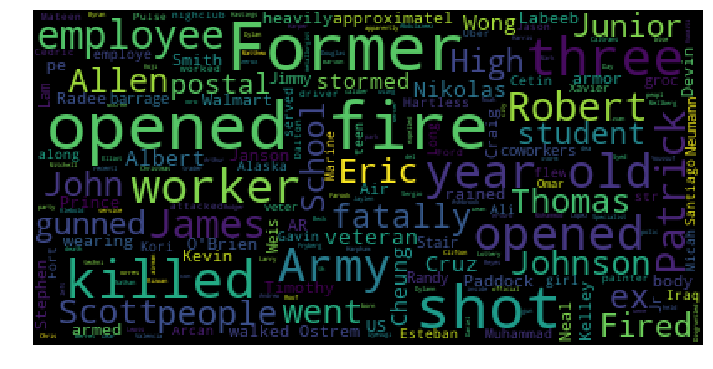

In [40]:
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                         random_state=42
                         ).generate(str(complete_shootings_df['summary']))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Database Creation

In [41]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [43]:
# Create an engine to a SQLite database file called `shootings.sqlite`
engine = create_engine("sqlite:///shootings.sqlite")

In [44]:
# Create a session
session = Session(engine)

In [45]:
# Create a connection to the engine called `conn`
conn = engine.connect()

In [46]:
#append data from csv created df to correct classes(tables)
complete_shootings_df.to_sql('shootings', engine, if_exists='append', index=False)

In [47]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)
# Collect the names of tables within the database
inspector.get_table_names()

['shootings']

In [48]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('shootings')
for column in columns:
    print(column["name"], column["type"])

case TEXT
location TEXT
date TEXT
year BIGINT
summary TEXT
fatalities BIGINT
injured TEXT
total_victims TEXT
venue TEXT
prior_signs_mental_health TEXT
mental_health TEXT
weapons_obtained_legally TEXT
where_obtained TEXT
type_weapon TEXT
weapon_details TEXT
race TEXT
gender TEXT
sources TEXT
mental_health_sources TEXT
latitude FLOAT
longitude FLOAT
shooting_type TEXT
city TEXT
state TEXT
